In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = np.array([int(2**n) for n in range(2,11)])
knots = np.zeros((len(N), 9))

for i in range(2,11):
    knots[i-2, :] = np.random.uniform(low = -1/N[i-2], high = 1/N[i-2], size = 9)

In [3]:
test = knots[0,:]

In [4]:
def oneNSol (knots):
    A = np.zeros((2,9))
    A[0,:] = knots
    A[1,:] = knots**3
    b = np.sin(knots)
    L = np.matmul(A, A.T)
    R = np.matmul(A, b)
    a1,a3 = np.linalg.solve(L, R)
    return np.array([a1,a3])

In [5]:
solution = list(map(oneNSol, knots))


[Text(0.5, 0, 'a1'),
 Text(0, 0.5, 'a3'),
 Text(0.5, 1.0, 'The fitted parameters')]

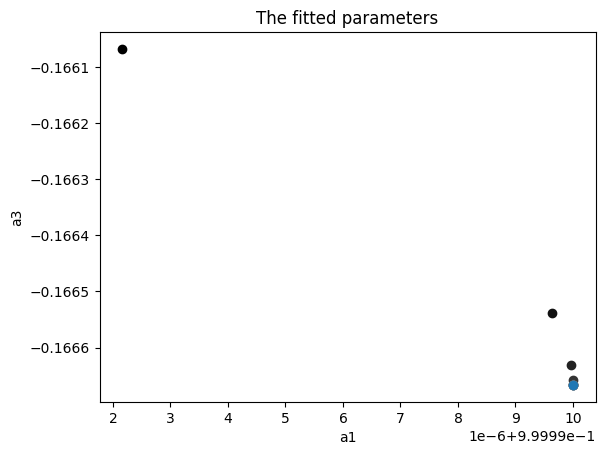

In [7]:
fig, ax = plt.subplots(1,1)
for i in range(len(solution)):
    ax.scatter(*solution[i], c=f'#{i*11}{i*11}{i*11}')
ax.scatter(1,-1/6, label ='real')
ax.set(xlabel='a1', ylabel = 'a3', title = 'The fitted parameters')

In [8]:
TRUE=np.array([1,-1/6])
solution = np.array(solution)

distance = [np.linalg.norm(point-TRUE) for point in solution]

[None,
 None,
 Text(0, 0.5, ' ||sol-x||_2'),
 Text(0.5, 0, 'N'),
 Text(0.5, 1.0, 'Euclidean distance between the solution of the system and the true value ')]

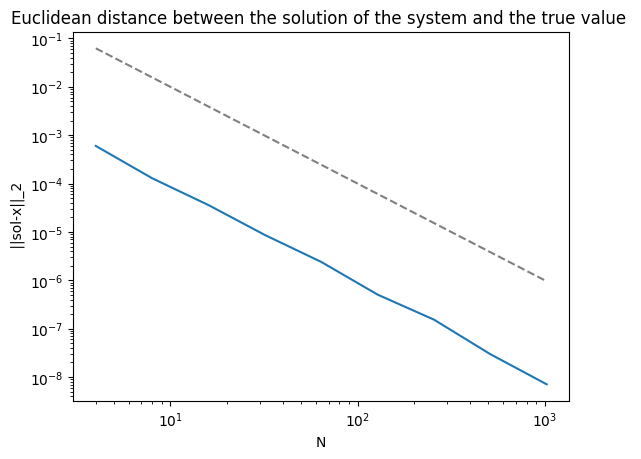

In [9]:
fig, ax = plt.subplots(1,1)

ax.plot(N, distance)
ax.plot(N,1/N**2, c='grey', linestyle='--')
ax.set(yscale = 'log',xscale='log', ylabel =' ||sol-x||_2', xlabel='N', title = 'Euclidean distance between the solution of the system and the true value ')

# Why quadratic behavior???
